In [1]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

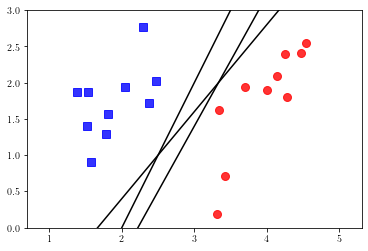

In [26]:
# generate data
# list of points 
import numpy as np 
import matplotlib.pyplot as plt
np.random.seed(22)

means = [[2, 2], [4, 2]] # ma trận kì vọng
cov = [[.3, .2], [.2, .3]] # ma trận HPS, phải đối xứng và nửa xác định dương
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N) # blue class data
X1 = np.random.multivariate_normal(means[1], cov, N) # red class data
X = np.concatenate((X0, X1), axis = 0) # ghép dữ liệu
y = np.concatenate((np.ones(N), -np.ones(N)), axis = 0) # label

# plot points
plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)
# plt.plot([3.5], [2.5], 'k^', markersize = 10, alpha = .8)
plt.axis('equal')
# axis limits
plt.ylim(0, 3)
plt.xlim(2, 4)

# fill region colors
x1 = np.arange(-10,10,0.1)
y1 = 2*x1 - 4
y2 = 1.8*x1 -4
y3 = 1.2*x1 - 2
plt.plot(x1, y1, 'k')
plt.plot(x1, y2, 'k')
plt.plot(x1, y3, 'k')

# hide tikcs 
cur_axes = plt.gca()
#cur_axes.axes.get_xaxis().set_ticks([])
#cur_axes.axes.get_yaxis().set_ticks([])

# plt.xlabel('$x_1$', fontsize = 20)
# plt.ylabel('$x_2$', fontsize = 20)

#     plt.savefig('svm1.png', bbox_inches='tight', dpi = 600)
plt.show()

In [22]:
from __future__ import print_function 
import numpy as np 
np.random.seed(22) # đảm bảo kết quả chạy ở các lần khác nhau là giống nhau, có thể thay 22 bằng số tự nhiên bất kì

# simulated samples 
means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N) # blue class data 
X1 = np.random.multivariate_normal(means[1], cov, N) # red class data
X = np.concatenate((X0, X1), axis = 0)               # all data 
y = np.concatenate((np.ones(N), -np.ones(N)), axis = 0) # label 

# solving the dual problem (variable: lambda)
from cvxopt import matrix, solvers
Xbar = np.concatenate((X0, -X1), axis = 0)
V = np.concatenate((X0, -X1), axis = 0) # V in the book
Q = matrix(V.dot(V.T))
p = matrix(-np.ones((2*N, 1))) # objective function 1/2 lambda^T*Q*lambda - 1^T*lambda 
# build A, b, G, h 
G = matrix(-np.eye(2*N))
h = matrix(np.zeros((2*N, 1)))
A = matrix(y.reshape(1, -1)) 
b = matrix(np.zeros((1, 1))) 
solvers.options['show_progress'] = False
sol = solvers.qp(Q, p, G, h, A, b) # giải bài toán quy hoạch toàn phương

l = np.array(sol['x']) # solution lambda 

# calculate w
w = Xbar.T.dot(l)
# calculate b 
S = np.where(l > 1e-8)[0] # support set, 1e-8 to avoid small value of l.
b = np.mean(y[S].reshape(-1, 1) - X[S,:].dot(w))
print('Number of suport vectors = ', S.size)
print('w = ', w.T)
print('b = ', b)

Number of suport vectors =  3
w =  [[-2.00984382  0.64068336]]
b =  4.668560683288061


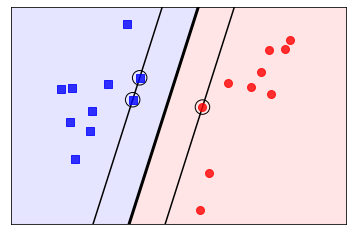

In [4]:
# draw
# plot points
fig, ax = plt.subplots()

x1 = np.arange(-10, 10, 0.1)
y1 = -w[0, 0]/w[1, 0]*x1 - b/w[1, 0]
y2 = -w[0, 0]/w[1, 0]*x1 - (b-1)/w[1, 0]
y3 = -w[0, 0]/w[1, 0]*x1 - (b+1)/w[1, 0]
plt.plot(x1, y1, 'k', linewidth = 3)
plt.plot(x1, y2, 'k')
plt.plot(x1, y3, 'k')


y4 = 10*x1
plt.plot(x1, y1, 'k')
plt.fill_between(x1, y1, color='red', alpha=0.1)
plt.fill_between(x1, y1, y4, color = 'blue', alpha = .1)


plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)

plt.axis('equal')
plt.ylim(0, 3)
plt.xlim(2, 4)

# hide tikcs 
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

# add circles around support vectors 
for m in S:
    circle = plt.Circle((X[m, 0], X[m, 1] ), 0.1, color='k', fill = False)
    ax.add_artist(circle)


#     plt.xlabel('$x_1$', fontsize = 20)
#     plt.ylabel('$x_2$', fontsize = 20)
#     plt.savefig('svm4.png', bbox_inches='tight', dpi = 300)
plt.show()

In [17]:
! pip install latex

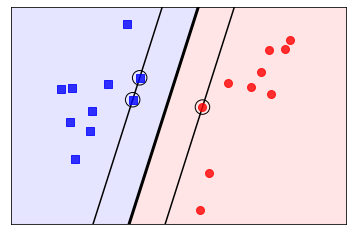

In [4]:
# draw
# plot points
fig, ax = plt.subplots()

x1 = np.arange(-10, 10, 0.1)
y1 = -w[0, 0]/w[1, 0]*x1 - b/w[1, 0]
y2 = -w[0, 0]/w[1, 0]*x1 - (b-1)/w[1, 0]
y3 = -w[0, 0]/w[1, 0]*x1 - (b+1)/w[1, 0]
plt.plot(x1, y1, 'k', linewidth = 3)
plt.plot(x1, y2, 'k')
plt.plot(x1, y3, 'k')


y4 = 10*x1
plt.plot(x1, y1, 'k')
plt.fill_between(x1, y1, color='red', alpha= .1)
plt.fill_between(x1, y1, y4, color = 'blue', alpha = .1)


plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)

plt.axis('equal')
plt.ylim(0, 3)
plt.xlim(2, 4)

# hide tikcs 
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

# add circles around support vectors 
for m in S:
    circle = plt.Circle((X[m, 0], X[m, 1] ), 0.1, color='k', fill = False)
    ax.add_artist(circle)


#     plt.xlabel('$x_1$', fontsize = 20)
#     plt.ylabel('$x_2$', fontsize = 20)
#     plt.savefig('svm4.png', bbox_inches='tight', dpi = 300)
plt.show()